In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
people = []
year = []

for i in range(11) :
    year.append(2010 + i)


print(str(year) + "연령별인구현황.csv")
for i in range(11) :
    people.append(str(year[i]) + "연령별인구현황.csv")

new_column = []
print(year)
people


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]연령별인구현황.csv
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


['2010연령별인구현황.csv',
 '2011연령별인구현황.csv',
 '2012연령별인구현황.csv',
 '2013연령별인구현황.csv',
 '2014연령별인구현황.csv',
 '2015연령별인구현황.csv',
 '2016연령별인구현황.csv',
 '2017연령별인구현황.csv',
 '2018연령별인구현황.csv',
 '2019연령별인구현황.csv',
 '2020연령별인구현황.csv']

In [57]:
def make_new_column(data) :
    new_column = []
    for column_name in data.columns :
        if(column_name == '행정구역') :
            new_column.append(column_name)
            continue
        if(column_name.find('총') != -1 or column_name.find('연령') != -1) or ((column_name.find('남') == -1) and  (column_name.find('여') == -1)):
            data = data.drop([column_name], axis=1)
        else :
            new_column.append(column_name[8:13])
    for i in range(len(data.columns)) :
        if(new_column[i].find('세') != -1) :
            if(new_column[i] == '100세 ') :
                new_column[i] = new_column[i].replace('세 ', ' ~')
            else :
                new_column[i] = new_column[i].replace('세', '')
    data.columns = new_column
    return data

In [140]:
def make_male_female_data(data) :
    male = []
    female = []
    male = data.iloc[0, 1:12].values.tolist()
    female = data.iloc[0, 12:].values.tolist()
    index = 0
    for i in male:
        male[index] = -int(str(i).replace(',', ''))
        index += 1
    index = 0
    for i in female :
        female[index] = int(str(i).replace(',', ''))
        index += 1
    return male, female

In [141]:
male, female = make_male_female_data(data)
male, female

([-21631,
  -33767,
  -39558,
  -43842,
  -41439,
  -37821,
  -19714,
  -6783,
  -1681,
  -215,
  -41],
 [19973, 29214, 37216, 41918, 43092, 39938, 18807, 9748, 4679, 711, 83])

In [165]:
male = []
female = []
def pyramid(year, people) :
    data = pd.read_csv("data/"+people, encoding='cp949')
    data = data[data['행정구역'].str.contains("강동구")]
    data = make_new_column(data)
    male, female = make_male_female_data(data)
    file_name = str(year)+'.png'
    
    y = data.columns[1:12]
    plt.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('ggplot')
    plt.figure(figsize=(6,8), dpi=150)

    plt.title('강동구의 {} 인구 피라미드'.format(year))
    plt.xlabel('인구 수')
    plt.ylabel('연령')
    plt.barh(y, male, label='남성')
    plt.barh(y, female, label='여성')
    plt.legend()
    plt.savefig(file_name)
    plt.show()
    return data

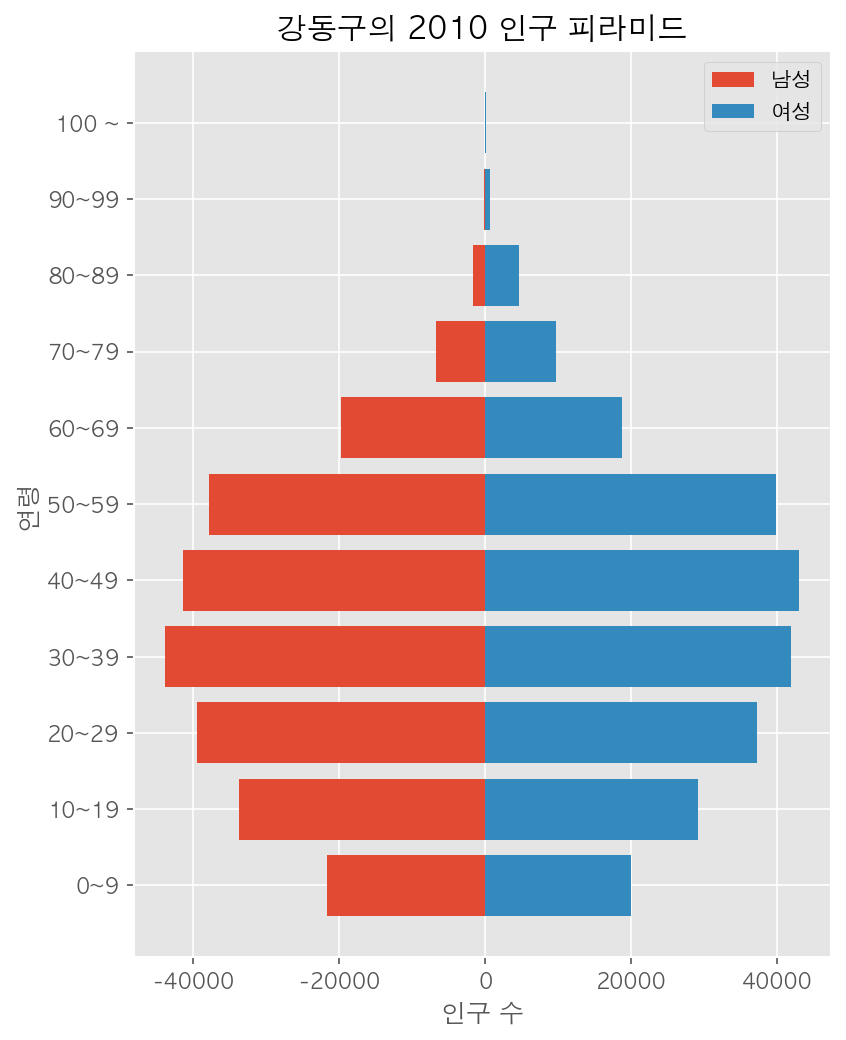

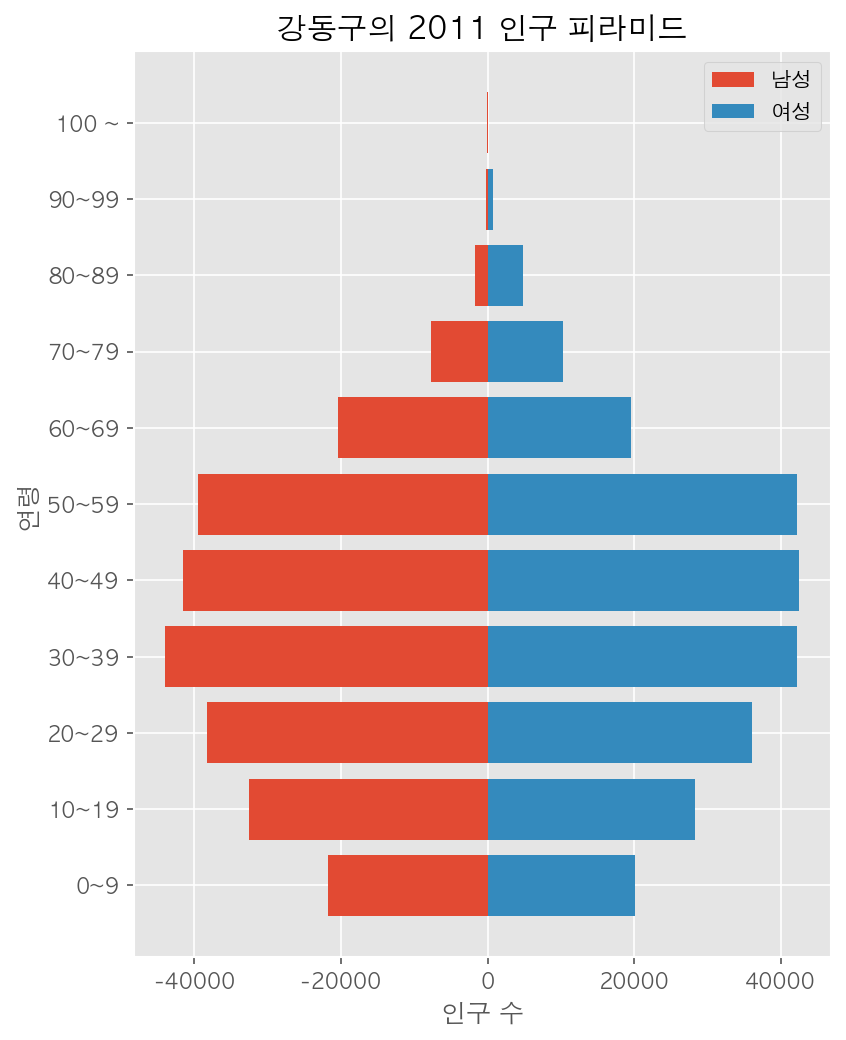

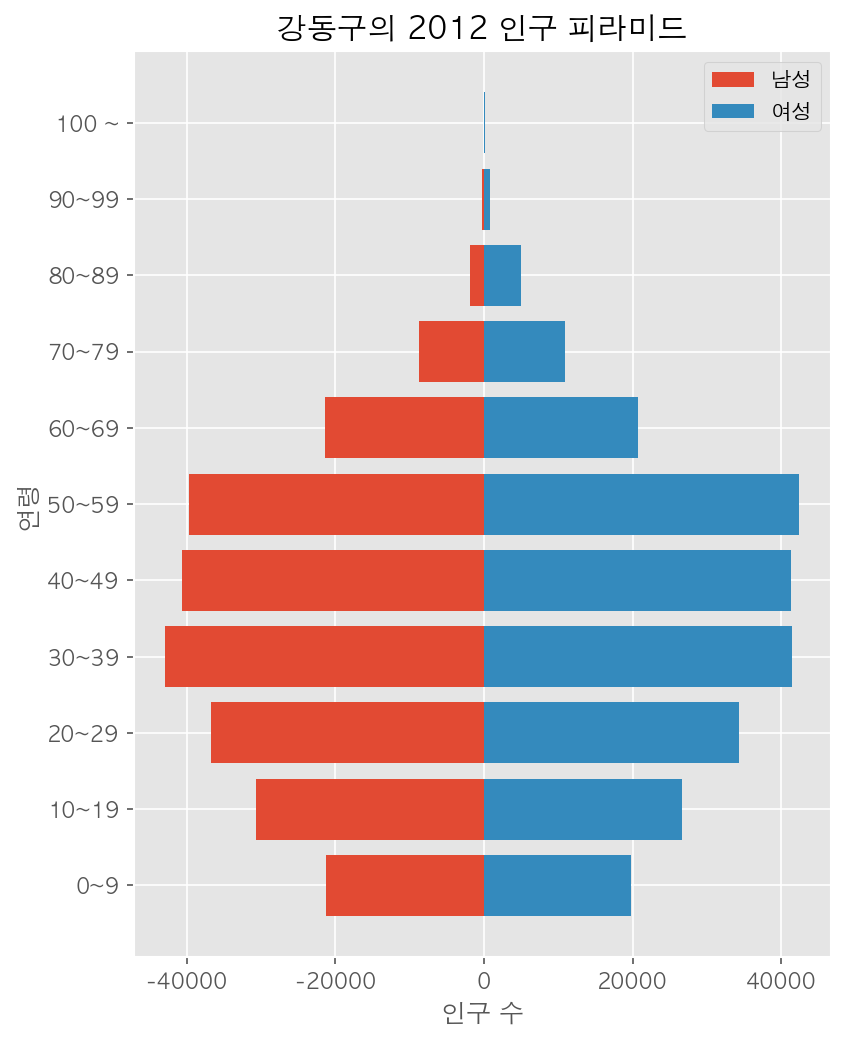

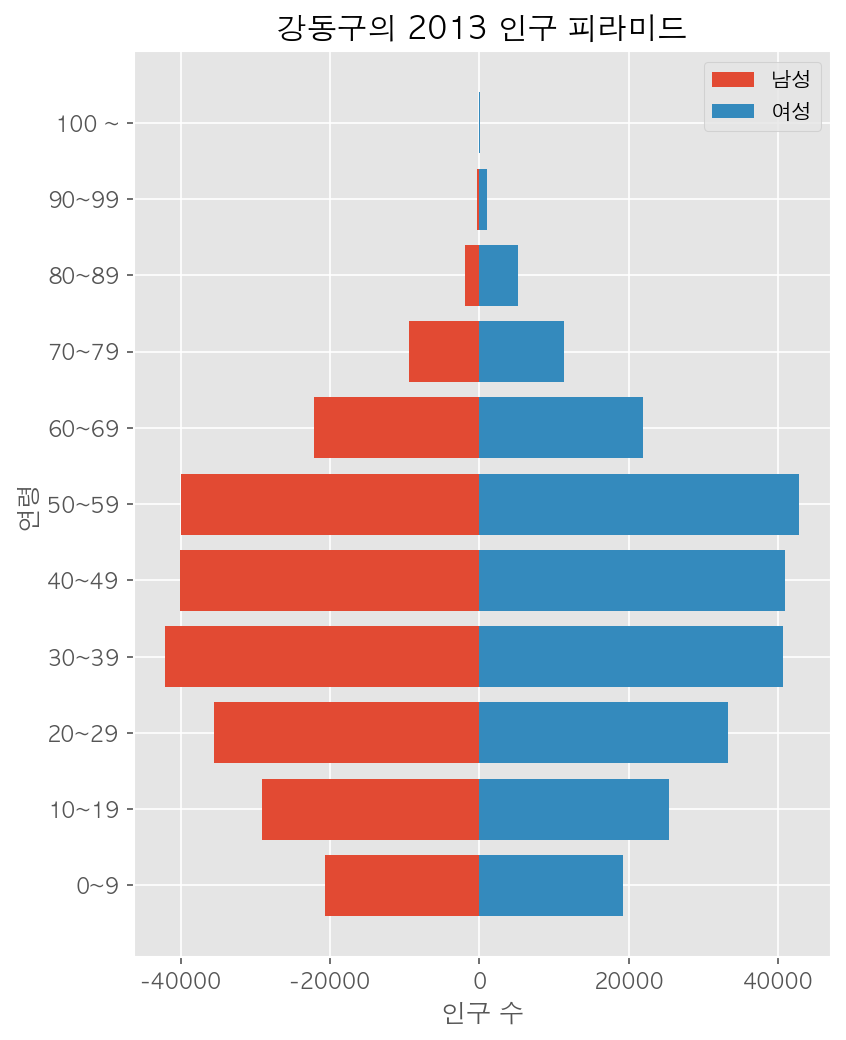

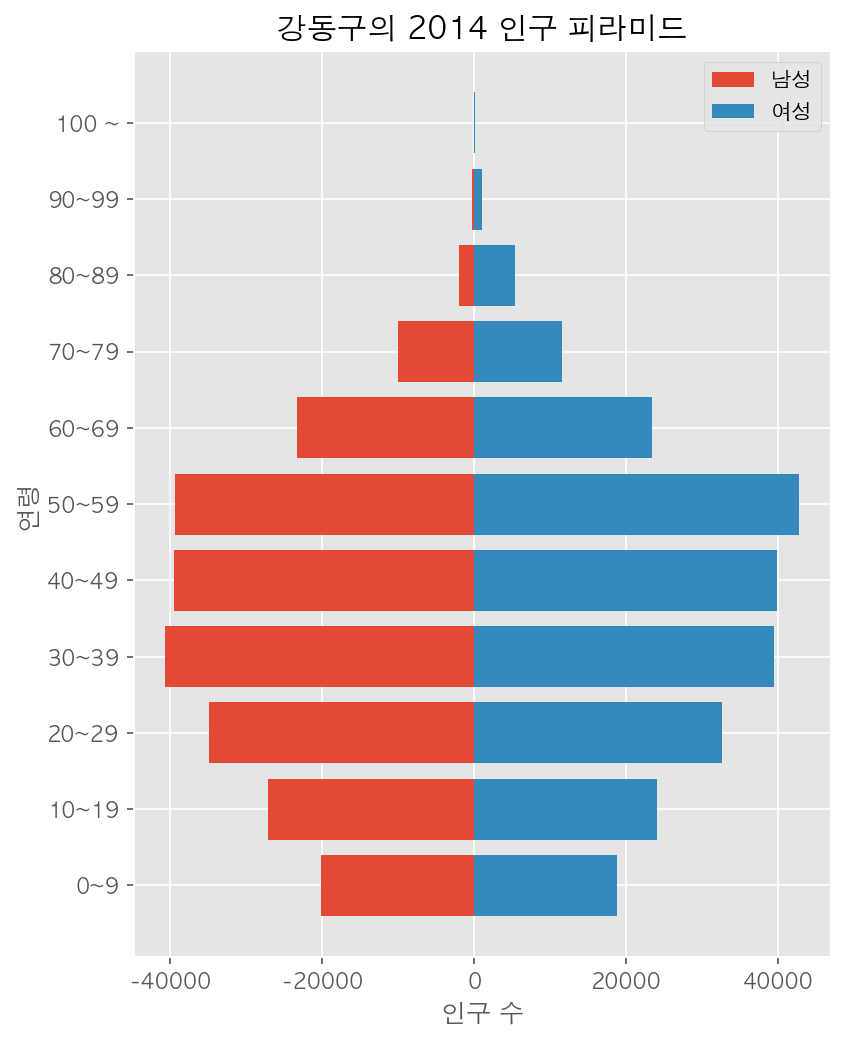

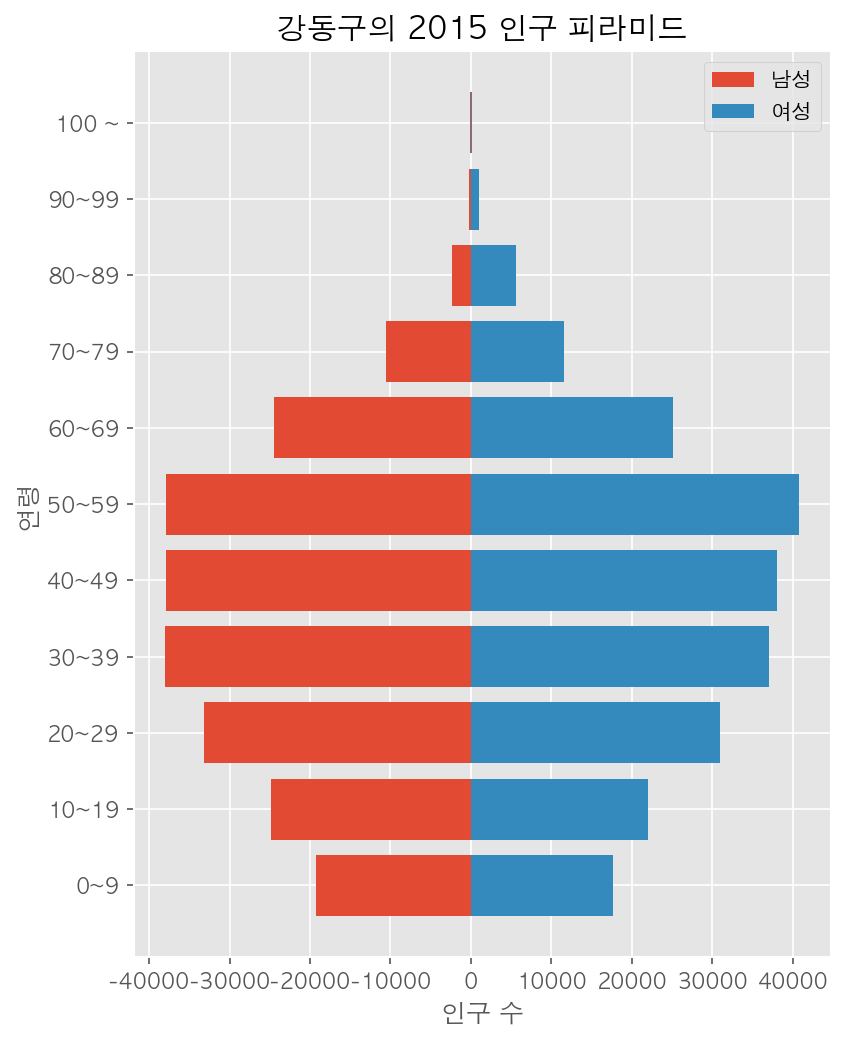

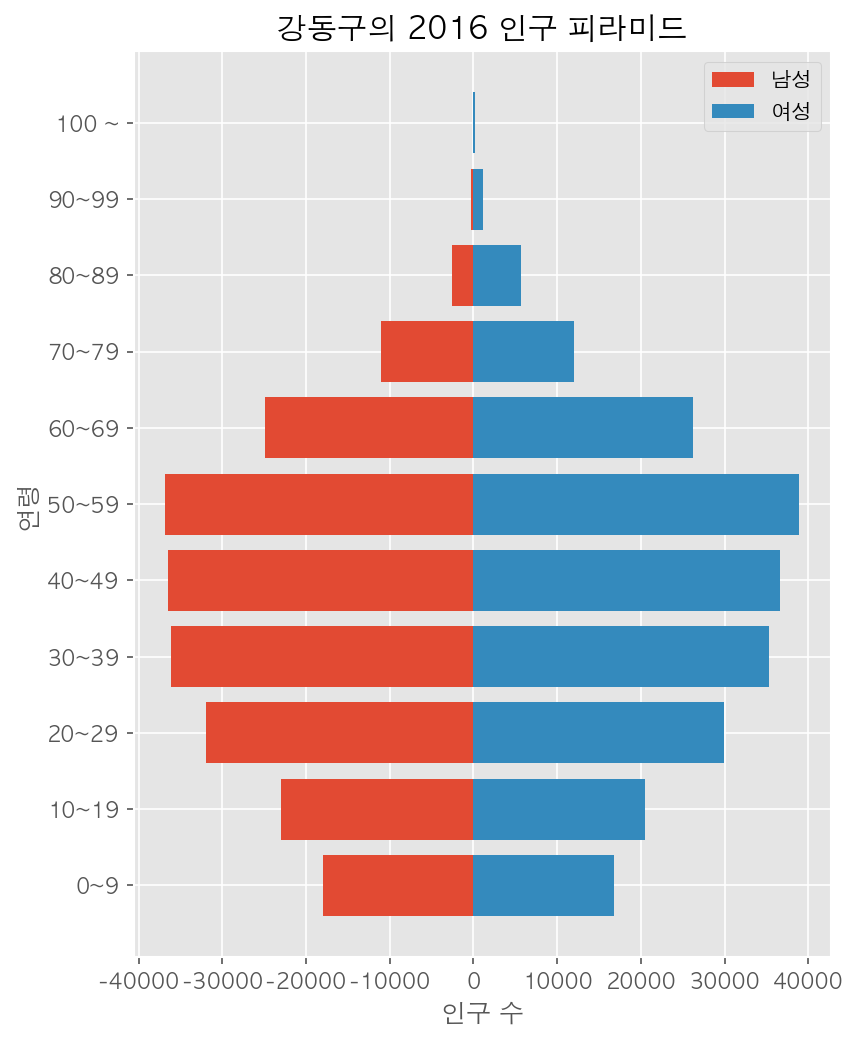

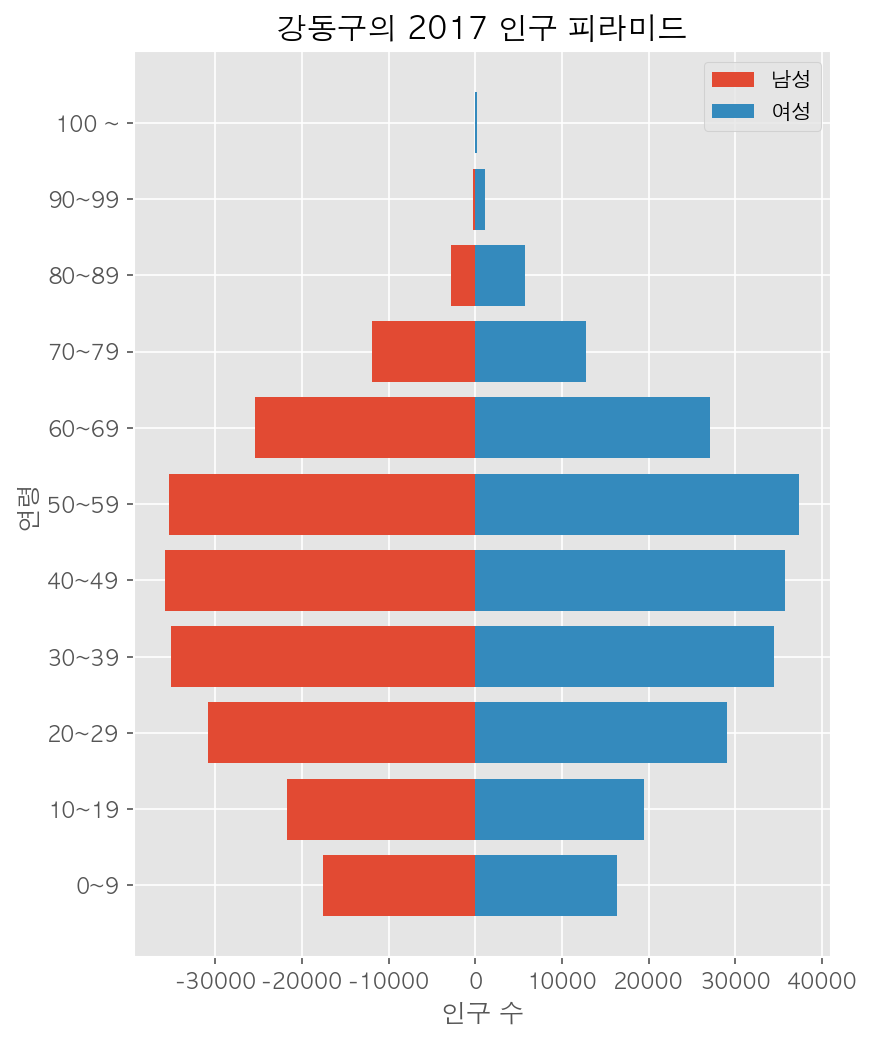

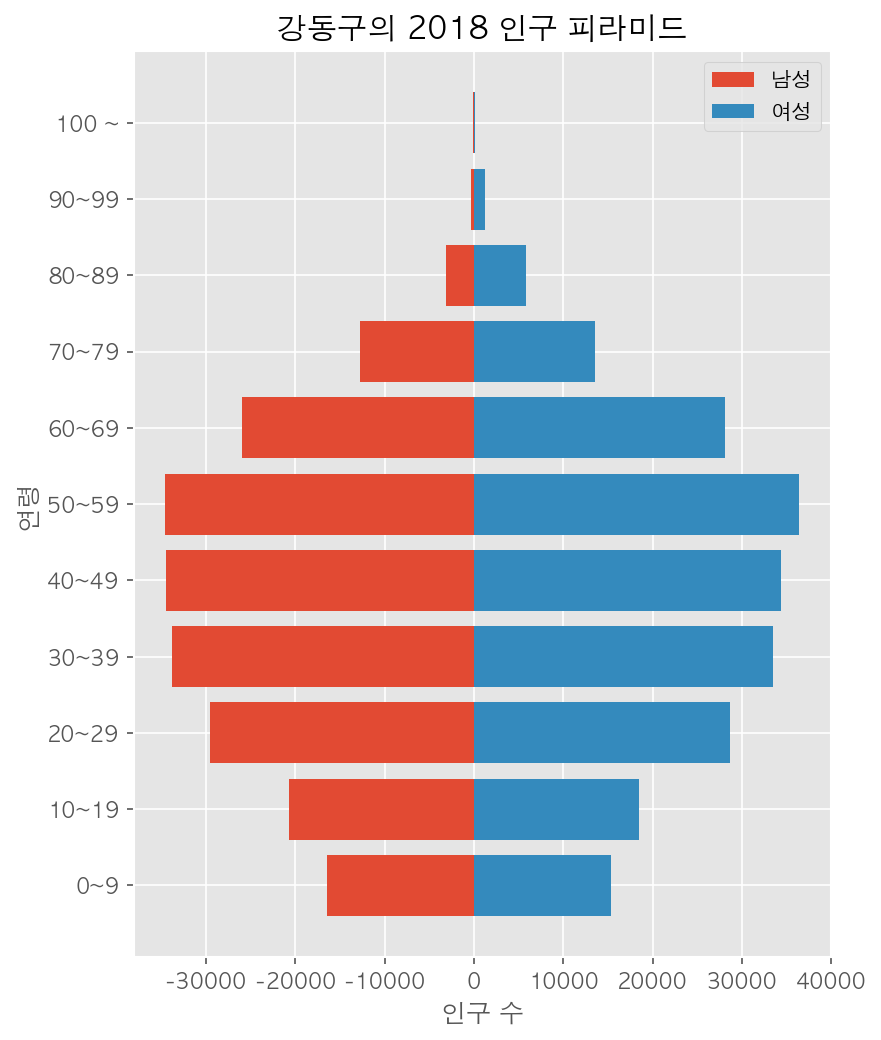

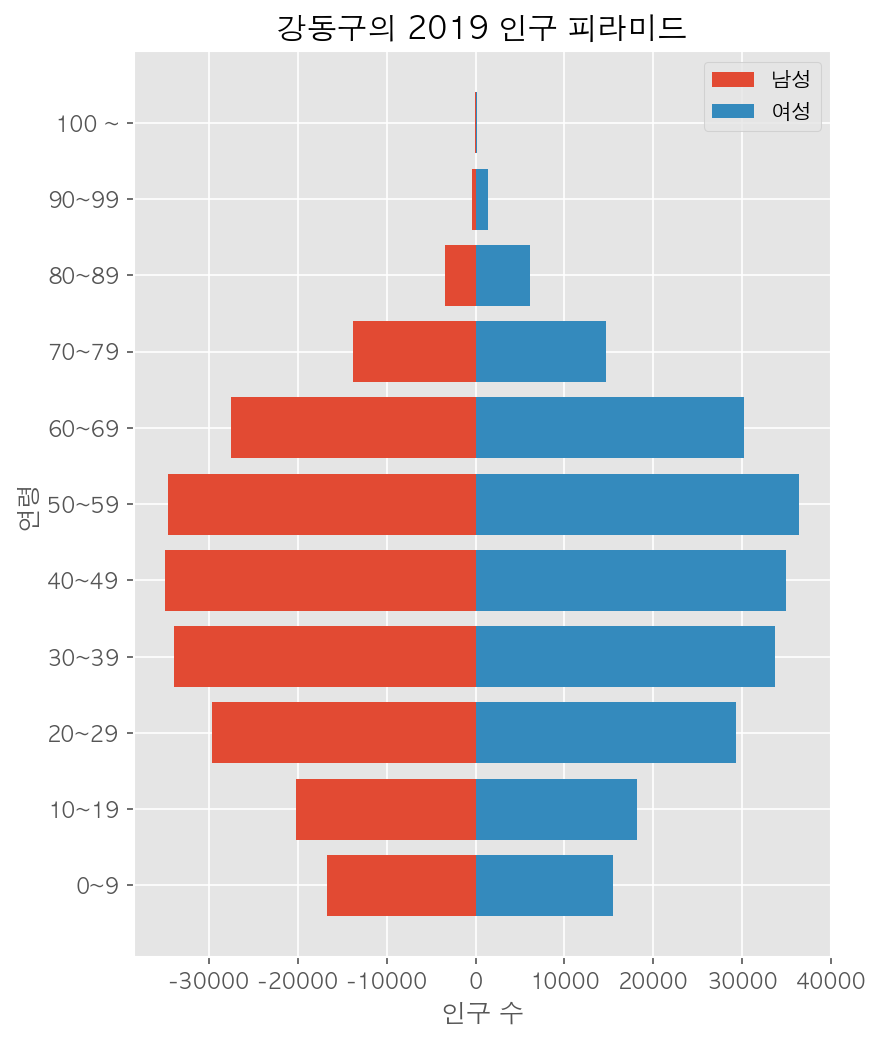

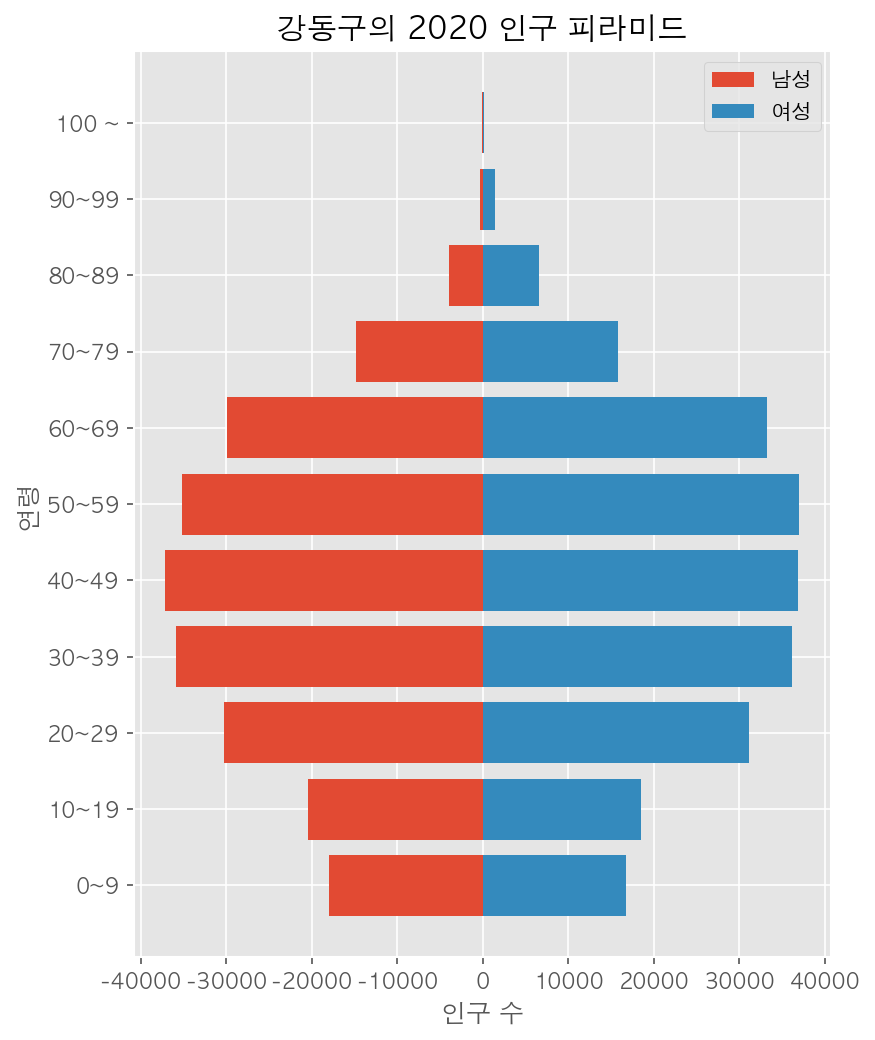

In [166]:
gangdong = []

for i in range(11) :
    gangdong.append(pyramid(year[i], people[i]))